Solar Radiation Prediction

[link](https://www.kaggle.com/datasets/dronio/SolarEnergy)

In [ ]:
import re
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# !pip install shap

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Thesis/SolarPrediction.csv")

In [ ]:
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [ ]:
df = data.copy()

In [ ]:
print(df.columns)

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet'],
      dtype='object')


In [ ]:
df=df.drop(['UNIXTime', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet'], axis = 1)
df.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,1.21,48,30.46,59,177.39,5.62
1,1.21,48,30.46,58,176.78,3.37
2,1.23,48,30.46,57,158.75,3.37
3,1.21,48,30.46,60,137.71,3.37
4,1.17,48,30.46,62,104.95,5.62


In [ ]:
# input_features = df.drop('Radiation', axis = 1)
# target = df['Radiation']

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# df_new = MinMaxScaler().fit_transform(input_features)

In [ ]:
# target_cont = df['Radiation'].apply(lambda x : int(x*100))

In [ ]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# bestfeatures = SelectKBest(score_func = chi2, k = 4)
# fit = bestfeatures.fit(df_new, target_cont)

In [ ]:
# scores = pd.DataFrame(fit.scores_)
# column = pd.DataFrame(input_features.columns)

In [ ]:
# featureScores = pd.concat([column, scores], axis=1)
# featureScores.columns = ['Features', 'feature_imp']

In [ ]:
# featureScores.sort_values(by = 'feature_imp', ascending=False, inplace=True)
# featureScores

In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
df.corr()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
Radiation,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627
Temperature,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458
Pressure,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639
Humidity,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624
WindDirection(Degrees),-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092
Speed,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000


In [ ]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20,20))
# sns.heatmap(df.corr(), annot = True,cmap='coolwarm',annot_kws={'size': 20})
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [ ]:
# pip install lightgbm

In [ ]:
# from lightgbm import LGBMRegressor

# model = LGBMRegressor()
# model.fit(X_train, y_train)

In [ ]:

# y_pred = model.predict(X_test)

In [ ]:
# from sklearn.metrics import r2_score
# print("R^2: ",r2_score(y_test, y_pred))

In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# mae = mean_absolute_error(y_test, y_pred)
# print("Mean Absolute Error (MAE):", mae)

# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print("Root Mean Squared Error (RMSE):", rmse)

In [ ]:
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error: ", mse)

In [ ]:
# from sklearn.metrics import mean_absolute_error
# print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

In [ ]:
# from sklearn.metrics import median_absolute_error
# print("Median Absolute Error: ", median_absolute_error(y_test,y_pred))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# Define the parameter grids for each model
param_grid_lr = {'fit_intercept': [True, False]}
param_grid_svr = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]}
param_grid_gb = {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.05, 0.01], 'max_depth': [3, 4, 5]}
param_grid_xgb = {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.05, 0.01], 'max_depth': [3, 4, 5]}
param_grid_lgbm = {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.05, 0.01], 'max_depth': [3, 4, 5]}

# Create the models
models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor()
}

# Create empty lists to store the metrics
r2_scores = []
mae_scores = []
rmse_scores = []

# Iterate over the models
for name, model in models.items():
    # Define the parameter grid for the current model
    param_grid = param_grid_lr if name == "Linear Regression" else param_grid_svr \
        if name == "SVR" else param_grid_gb if name == "Gradient Boosting" \
        else param_grid_xgb if name == "XGBoost" else param_grid_lgbm

    # Perform GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Get the best model and its hyperparameters
    best_model = grid_search.best_estimator_

    # Make predictions on the test data
    y_pred = best_model.predict(X_test)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Append the metrics to the respective lists
    r2_scores.append(r2)
    mae_scores.append(mae)
    rmse_scores.append(rmse)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    "Model": models.keys(),
    "R^2": r2_scores,
    "MAE": mae_scores,
    "RMSE": rmse_scores
})




<Figure size 1000x600 with 0 Axes>

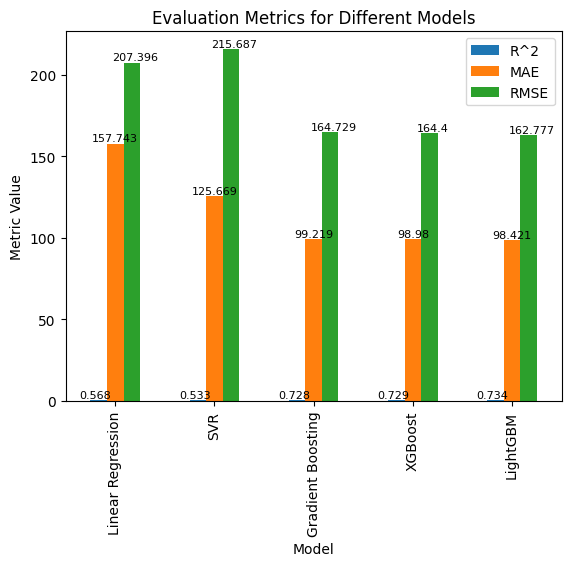

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar plots for each metric
metrics_df.plot(x="Model", y=["R^2", "MAE", "RMSE"], kind="bar")

# Add title and labels
plt.title("Evaluation Metrics for Different Models")
plt.xlabel("Model")
plt.ylabel("Metric Value")

# Display the exact values on top of each bar
for i in range(len(metrics_df)):
    plt.text(i - 0.2, metrics_df.loc[i, "R^2"] + 0.01, str(round(metrics_df.loc[i, "R^2"], 3)), ha="center", va="bottom", fontsize=8)
    plt.text(i, metrics_df.loc[i, "MAE"] + 0.01, str(round(metrics_df.loc[i, "MAE"], 3)), ha="center", va="bottom", fontsize=8)
    plt.text(i + 0.2, metrics_df.loc[i, "RMSE"] + 0.01, str(round(metrics_df.loc[i, "RMSE"], 3)), ha="center", va="bottom", fontsize=8)

# Show the plot
plt.show()

In [ ]:
from tabulate import tabulate
# Print the metrics table
print(tabulate(metrics_df, headers='keys', tablefmt='psql'))

+----+-------------------+----------+----------+---------+
|    | Model             |      R^2 |      MAE |    RMSE |
|----+-------------------+----------+----------+---------|
|  0 | Linear Regression | 0.568154 | 157.743  | 207.396 |
|  1 | SVR               | 0.532936 | 125.669  | 215.687 |
|  2 | Gradient Boosting | 0.727561 |  99.219  | 164.729 |
|  3 | XGBoost           | 0.728648 |  98.9795 | 164.4   |
|  4 | LightGBM          | 0.733981 |  98.4206 | 162.777 |
+----+-------------------+----------+----------+---------+


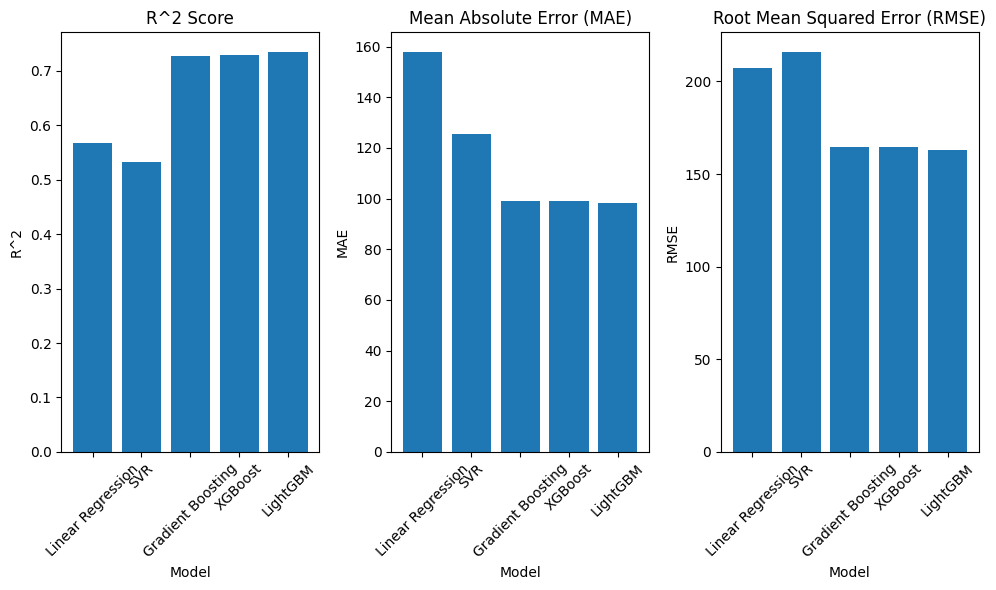

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the R^2 bar plot
plt.subplot(1, 3, 1)
plt.bar(metrics_df.index, metrics_df["R^2"])
plt.title("R^2 Score")
plt.xlabel("Model")
plt.ylabel("R^2")
plt.xticks(metrics_df.index, metrics_df["Model"], rotation=45)

# Plot the MAE bar plot
plt.subplot(1, 3, 2)
plt.bar(metrics_df.index, metrics_df["MAE"])
plt.title("Mean Absolute Error (MAE)")
plt.xlabel("Model")
plt.ylabel("MAE")
plt.xticks(metrics_df.index, metrics_df["Model"], rotation=45)

# Plot the RMSE bar plot
plt.subplot(1, 3, 3)
plt.bar(metrics_df.index, metrics_df["RMSE"])
plt.title("Root Mean Squared Error (RMSE)")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.xticks(metrics_df.index, metrics_df["Model"], rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()